## Máquinas de Soporte Vectorial (SVM)

Las **Máquinas de Soporte Vectorial (SVM)** son un algoritmo de aprendizaje supervisado que se utiliza para tareas de clasificación y regresión. Su objetivo principal es encontrar un hiperplano óptimo que separe las clases en el espacio de características de la manera más clara posible.

### Conceptos Clave:
*   **Hiperplano:** Una línea (en 2D), un plano (en 3D) o un hiperplano (en dimensiones superiores) que separa los puntos de datos de diferentes clases.
*   **Vectores de Soporte:** Son los puntos de datos más cercanos al hiperplano, es decir, aquellos que definen el margen. Juegan un papel crucial en la definición del hiperplano.
*   **Margen:** La distancia entre el hiperplano y los vectores de soporte más cercanos. El objetivo de un SVM es maximizar este margen.
*   **Kernel Trick:** Las SVM pueden manejar datos no linealmente separables utilizando funciones kernel que transforman los datos a un espacio de mayor dimensión donde pueden ser linealmente separables. Kernels comunes incluyen lineal, polinomial, función base radial (RBF) y sigmoide.

### Uso en Python (Scikit-learn):

```python
  from sklearn.svm import SVC
  # Usaremos un kernel lineal para empezar. 'C' es el parámetro de regularización.
  svm_model = SVC(kernel='linear', random_state=42)
  print("\nEntrenando el modelo SVM...")
  svm_model.fit(X_train, y_train)
  print("Modelo SVM entrenado exitosamente.")

  # 4. Realizar predicciones en el conjunto de prueba
  y_pred = svm_model.predict(X_test)
```

Tamaño del conjunto de entrenamiento: 105 muestras
Tamaño del conjunto de prueba: 45 muestras
Entrenando el modelo SVM con kernel linear...
Modelo SVM linear entrenado exitosamente.

--- Evaluación del Modelo SVM ---
Entrenando el modelo SVM con kernel rbf...
Modelo SVM rbf entrenado exitosamente.

--- Evaluación del Modelo SVM ---
Entrenando el modelo SVM con kernel poly...
Modelo SVM poly entrenado exitosamente.

--- Evaluación del Modelo SVM ---
Entrenando el modelo SVM con kernel sigmoid...
Modelo SVM sigmoid entrenado exitosamente.

--- Evaluación del Modelo SVM ---
       Modelo  Accuracy     MCC  Sensitivity  Specificity
0      Lineal    1.0000  1.0000       1.0000       1.0000
1         RBF    0.9556  0.9333       0.9556       0.9778
2  Polinomial    0.9556  0.9333       0.9556       0.9778
3     Sigmoid    0.0444 -0.5005       0.0444       0.5222


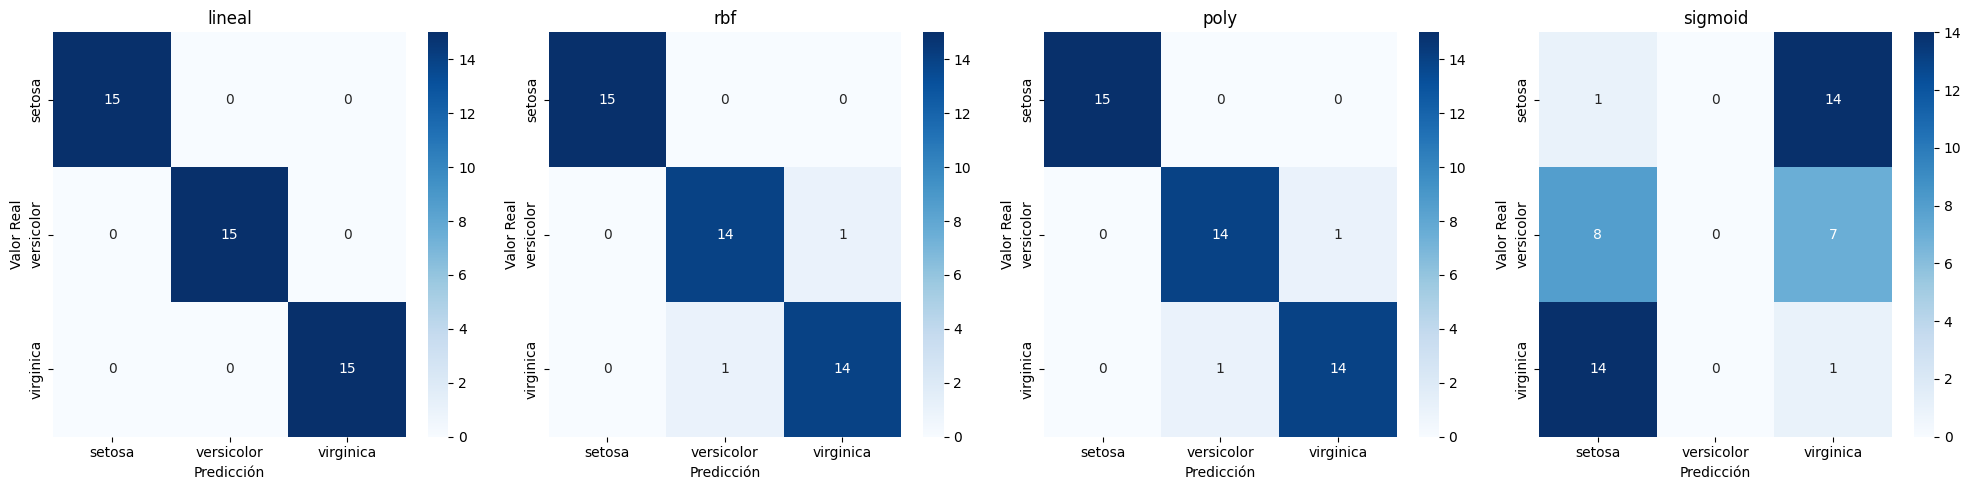

In [134]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_metrics(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred)

    # Accuracy
    acc = accuracy_score(y_true, y_pred)

    # MCC
    mcc = matthews_corrcoef(y_true, y_pred)

    # Sensibilidad y Especificidad por clase
    sen_list = []
    spe_list = []

    for i in range(len(cm)):
        TP = cm[i,i]
        FN = np.sum(cm[i,:]) - TP
        FP = np.sum(cm[:,i]) - TP
        TN = np.sum(cm) - TP - FN - FP

        sen = TP/(TP+FN) if (TP+FN)!=0 else 0
        spe = TN/(TN+FP) if (TN+FP)!=0 else 0

        sen_list.append(sen)
        spe_list.append(spe)

    sen_macro = np.mean(sen_list)
    spe_macro = np.mean(spe_list)

    return acc, mcc, sen_macro, spe_macro


def build_svm_model(X_train, y_train,X_test, kernel='lineal'):
  # 3. Construir y entrenar el modelo SVM
  # Usaremos un kernel lineal para empezar. 'C' es el parámetro de regularización.
  svm_model = SVC(kernel=kernel, random_state=42)
  print(f'Entrenando el modelo SVM con kernel {kernel}...')
  svm_model.fit(X_train, y_train)
  print(f'Modelo SVM {kernel} entrenado exitosamente.')

  # 4. Realizar predicciones en el conjunto de prueba
  y_pred = svm_model.predict(X_test)

  # 5. Evaluar el modelo
  print("\n--- Evaluación del Modelo SVM ---")
  return y_pred

# 1. Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Convertir a DataFrame para mejor visualización (opcional)
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


y_pred_lineal = build_svm_model(X_train, y_train, X_test, kernel='linear')
y_pred_rbf = build_svm_model(X_train, y_train, X_test, kernel='rbf')
y_pred_poly = build_svm_model(X_train, y_train, X_test, kernel='poly')
y_pred_sigmoid = build_svm_model(X_train, y_train, X_test, kernel='sigmoid')

metrics_lineal = calculate_metrics(y_test, y_pred_lineal)
metrics_rbf = calculate_metrics(y_test, y_pred_rbf)
metrics_poly = calculate_metrics(y_test, y_pred_poly)
metrics_sigmoid = calculate_metrics(y_test, y_pred_sigmoid)

results = pd.DataFrame({
    'Modelo':['Lineal','RBF','Polinomial','Sigmoid'],
    'Accuracy':[metrics_lineal[0], metrics_rbf[0], metrics_poly[0], metrics_sigmoid[0]],
    'MCC':[metrics_lineal[1], metrics_rbf[1], metrics_poly[1], metrics_sigmoid[1]],
    'Sensitivity':[metrics_lineal[2], metrics_rbf[2], metrics_poly[2], metrics_sigmoid[2]],
    'Specificity':[metrics_lineal[3], metrics_rbf[3], metrics_poly[3], metrics_sigmoid[3]]
})

print(results.round(4))

# Matriz de Confusión
conf_matrix_lineal = confusion_matrix(y_test, y_pred_lineal)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

matrices = [
    conf_matrix_lineal,
    conf_matrix_rbf,
    conf_matrix_poly,
    conf_matrix_sigmoid
]

titulos = [
    'lineal',
    'rbf',
    'poly',
    'sigmoid'
]
for i in range(4):
    sns.heatmap(
        matrices[i],
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=iris.target_names,
        yticklabels=iris.target_names,
        ax=axes[i]
    )

    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')
    axes[i].set_title(titulos[i])

plt.tight_layout()
plt.show()